In [ ]:
# import librareis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# read datsets
data_values=pd.read_csv('/content/drive/MyDrive/ML Project/TrainingData.csv')
test_values=pd.read_csv('/content/drive/MyDrive/ML Project/TestingData.csv')
data_labels=pd.read_csv('/content/drive/MyDrive/ML Project/TrainingLables.csv')
data = data_values.merge(data_labels, on='id')

In [ ]:
print(data_values.shape)
print(test_values.shape)
print(data_labels.shape)

(59400, 40)
(14850, 40)
(59400, 2)


In [ ]:
# check null values count
data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
data.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
data['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [ ]:
data['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [ ]:
data['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [ ]:
data['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [ ]:
# find sub-groups of this column
data.loc[data['management_group']=='user-group']['management'].value_counts() 

vwc            40507
wug             6515
water board     2933
wua             2535
Name: management, dtype: int64

In [ ]:
data.shape

(59400, 41)

In [ ]:
data.groupby(['management_group','management']).count()

id  ...  status_group
management_group management               ...              
commercial       company             685  ...           685
                 private operator   1971  ...          1971
                 trust                78  ...            78
                 water authority     904  ...           904
other            other               844  ...           844
                 other - school       99  ...            99
parastatal       parastatal         1768  ...          1768
unknown          unknown             561  ...           561
user-group       vwc               40507  ...         40507
                 water board        2933  ...          2933
                 wua                2535  ...          2535
                 wug                6515  ...          6515

[12 rows x 39 columns]

In [ ]:
data.shape

(59400, 41)

In [ ]:
data['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [ ]:
data['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

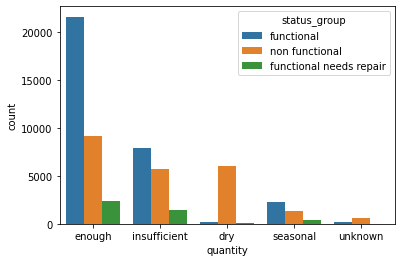

In [ ]:
ax = sns.countplot(x='quantity', hue="status_group", data=data)

In [ ]:
data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [ ]:
data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [ ]:
data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [ ]:
data.groupby(['source_class','source']).count()

id  ...  status_group
source_class source                       ...              
groundwater  hand dtw                874  ...           874
             machine dbh           11075  ...         11075
             shallow well          16824  ...         16824
             spring                17021  ...         17021
surface      dam                     656  ...           656
             lake                    765  ...           765
             rainwater harvesting   2295  ...          2295
             river                  9612  ...          9612
unknown      other                   212  ...           212
             unknown                  66  ...            66

[10 rows x 39 columns]

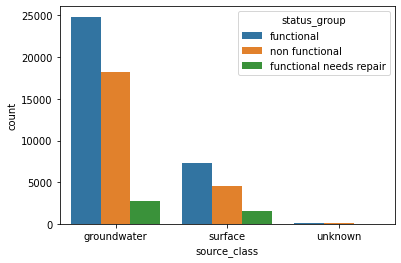

In [ ]:
ax = sns.countplot(x='source_class', hue="status_group", data=data)

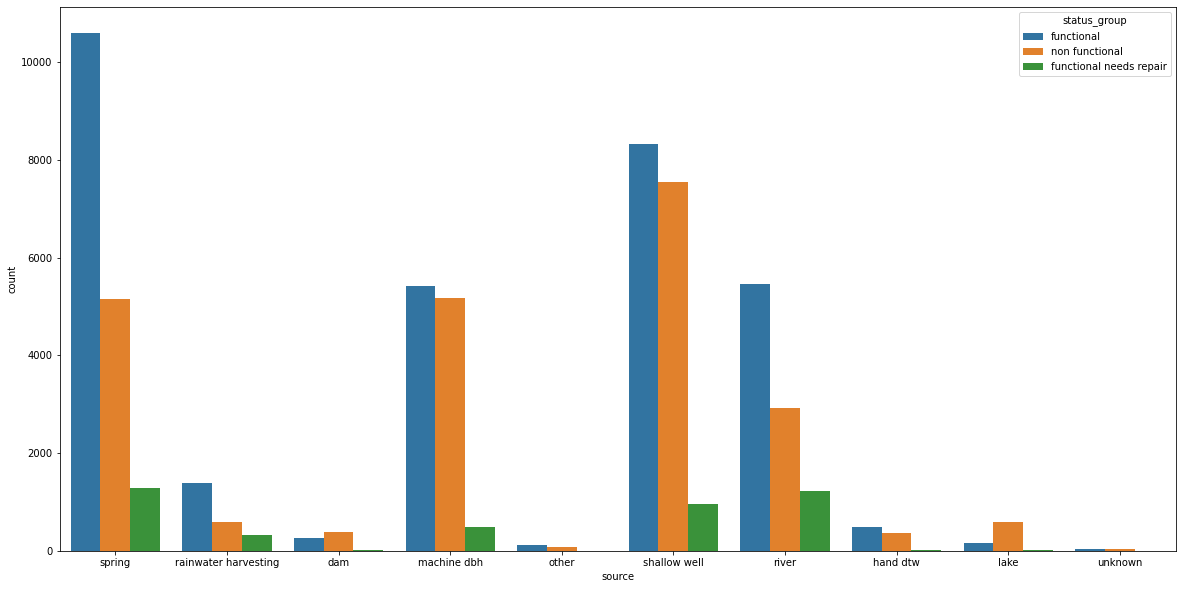

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=data)

In [ ]:
data['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [ ]:
data['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

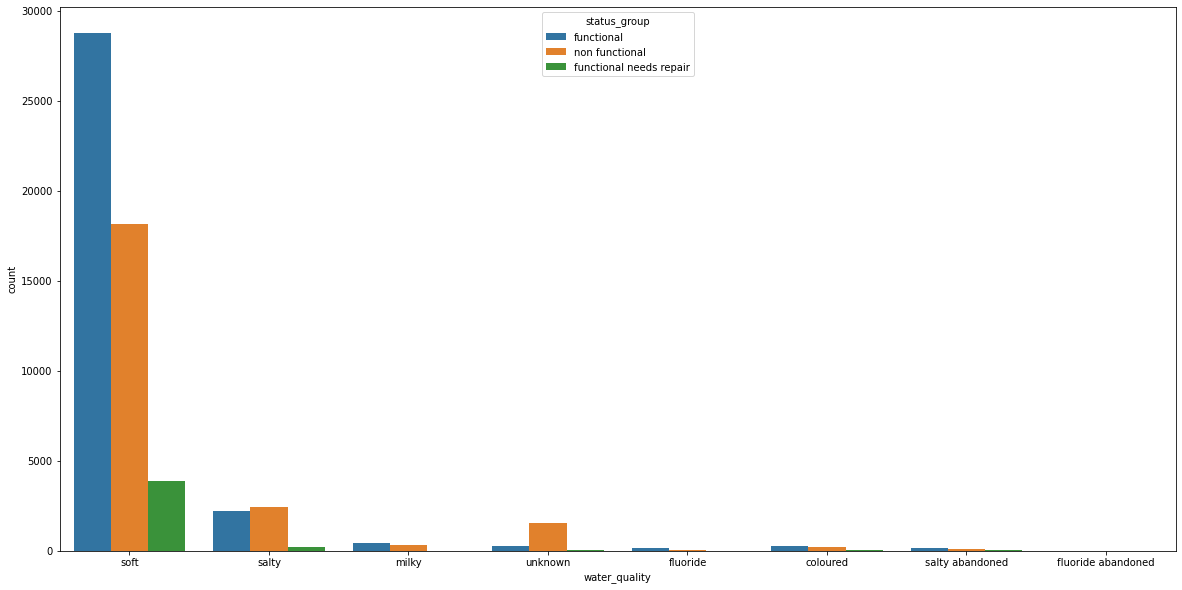

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=data)

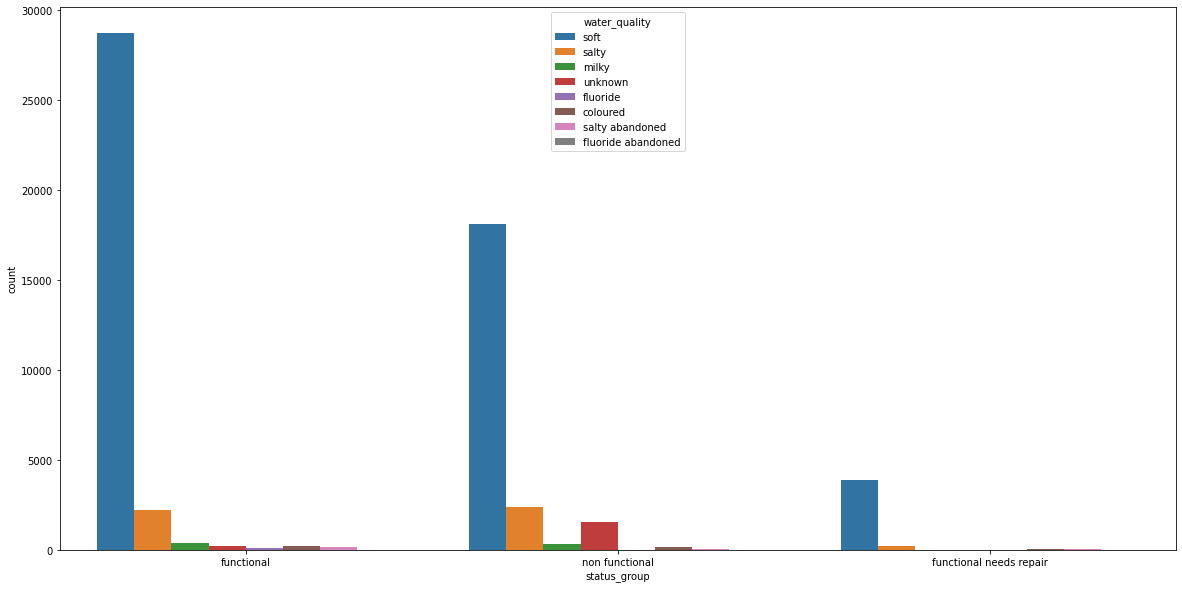

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=data)

In [ ]:
data['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [ ]:
data['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

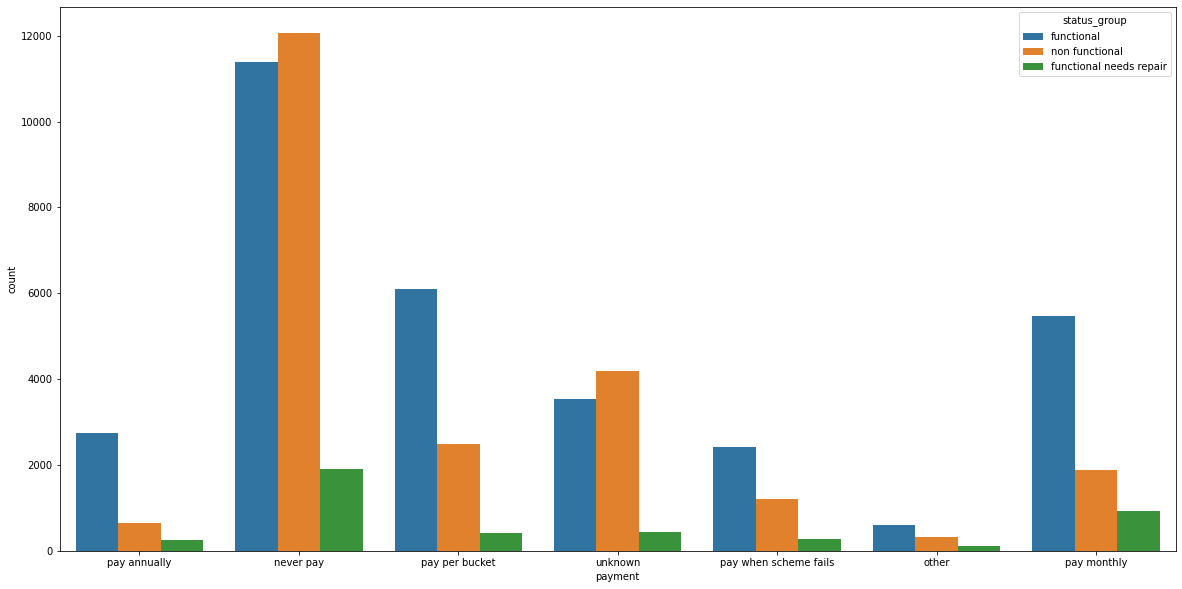

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=data)

In [ ]:
data['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [ ]:
data['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [ ]:
data['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [ ]:
data.groupby(['extraction_type_class','extraction_type_group']).count()

id  ...  status_group
extraction_type_class extraction_type_group         ...              
gravity               gravity                26780  ...         26780
handpump              afridev                 1770  ...          1770
                      india mark ii           2400  ...          2400
                      india mark iii            98  ...            98
                      nira/tanira             8154  ...          8154
                      other handpump           364  ...           364
                      swn 80                  3670  ...          3670
motorpump             mono                    2865  ...          2865
                      other motorpump          122  ...           122
other                 other                   6430  ...          6430
rope pump             rope pump                451  ...           451
submersible           submersible             6179  ...          6179
wind-powered          wind-powered             117  ...           117

[13 rows x 39 columns]

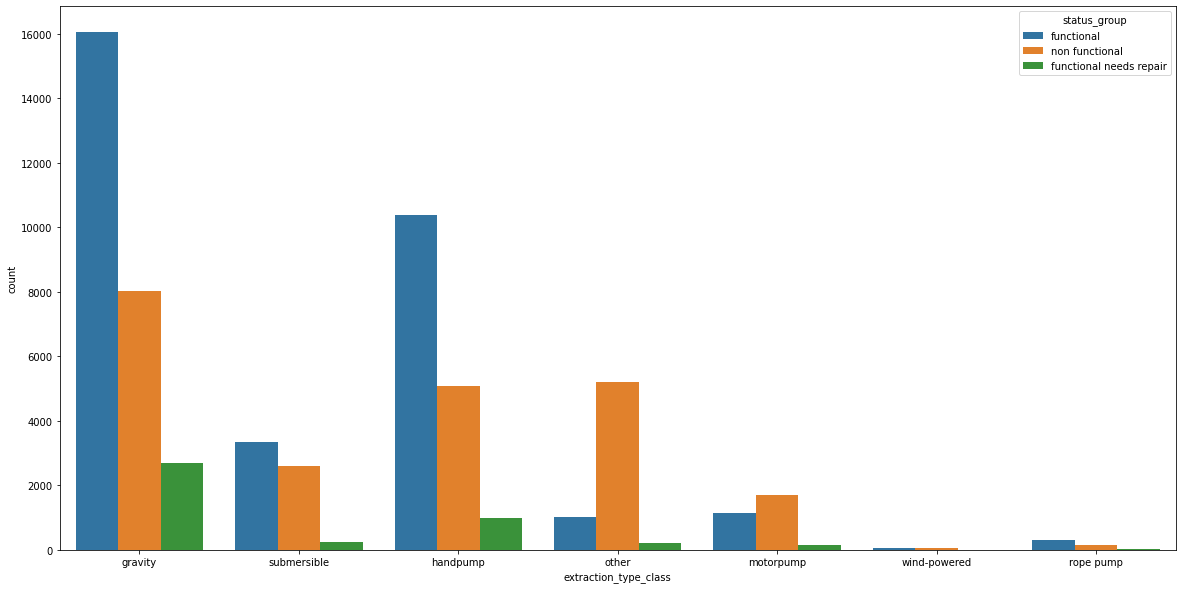

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=data)

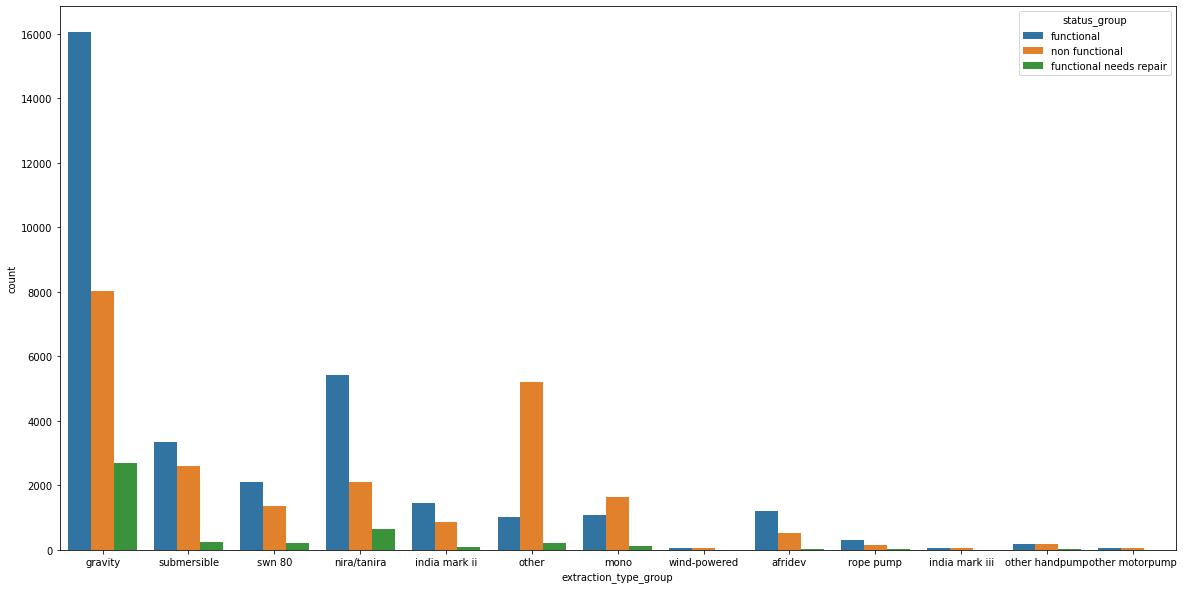

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=data)

In [ ]:
data['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [ ]:
data['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

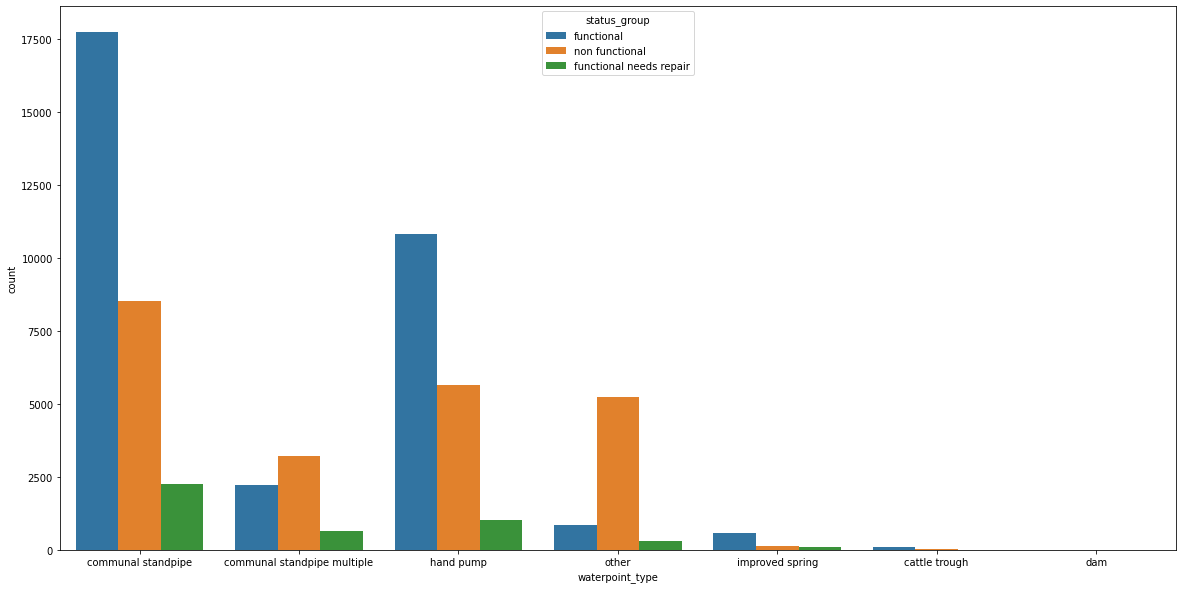

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=data)

In [ ]:
data.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

In [ ]:
test_values.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

In [ ]:
print(data.shape)
print(test_values.shape)

(59400, 31)
(14850, 30)


In [ ]:
data['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [ ]:
data['decade'] = data['construction_year'] #creating new columns
test_values['decade'] = test_values['construction_year']

In [ ]:
# dividing the column decades

data['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
data['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
data['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
data['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
data['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
data['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [ ]:
test_values['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
test_values['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
test_values['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
test_values['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
test_values['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
test_values['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [ ]:
data['decade'].value_counts()

0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [ ]:
data.loc[data['construction_year']!=0].describe() # finding mean and median without zero values

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [ ]:
data['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
test_values['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

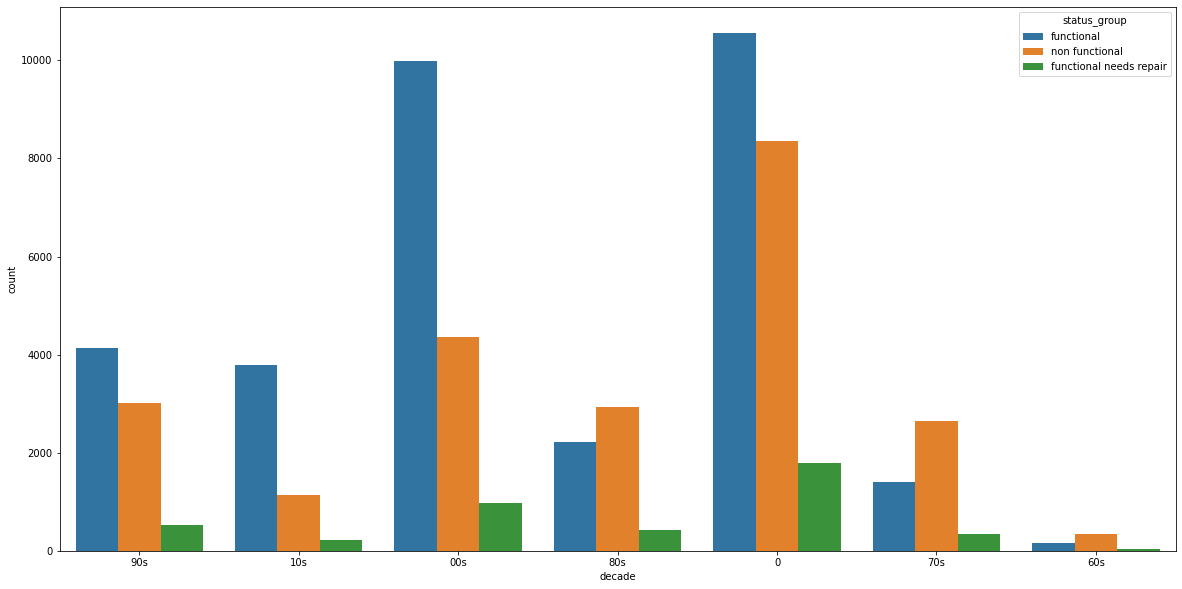

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=data)

In [ ]:
data['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [ ]:
data.drop(columns=['recorded_by'],inplace=True ) #dropping the column
test_values.drop(columns=['recorded_by'],inplace=True ) #dropping the column

In [ ]:
data['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown
test_values['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown

In [ ]:
data['installer'].value_counts().head(100).sum() # to check the first common 100 values sum

47237

In [ ]:
data['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown
test_values['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [ ]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

data['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

data['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
data['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

data['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

data['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

data['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

data['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

data['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
data['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

data['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

data['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

data['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

data['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [ ]:
test_values['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

test_values['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
test_values['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

test_values['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

test_values['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

test_values['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

test_values['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

test_values['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
test_values['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

test_values['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

test_values['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

test_values['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

test_values['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [ ]:
# continue to replacing spellin mistakes and getting together values
data['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
data['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
data['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
data['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
data['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
data['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
data['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
data['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
data['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
data['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [ ]:
test_values['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
test_values['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
test_values['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
test_values['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
test_values['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
test_values['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
test_values['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
test_values['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
test_values['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
test_values['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [ ]:
data['installer'].value_counts().head(20) #taking most 20 common installer

DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: installer, dtype: int64

In [ ]:
# Creating new dataframe which just picks our desired values

data_1 = data.loc[data['installer']== 'DWE']
data_2 = data.loc[data['installer']== 'Unknown']              
data_3 = data.loc[data['installer']== 'Government'] 
data_4 = data.loc[data['installer']== 'Community'] 
data_5 = data.loc[data['installer']== 'DANIDA'] 
data_6 = data.loc[data['installer']== 'RWE'] 
data_7 = data.loc[data['installer']== 'District council'] 
data_8 = data.loc[data['installer']== 'Central government']
data_9 = data.loc[data['installer']== 'KKKT'] 
data_10 = data.loc[data['installer']== 'HESAWA'] 
data_11 = data.loc[data['installer']== 'TCRS'] 
data_12 = data.loc[data['installer']== 'world vision'] 
data_13 = data.loc[data['installer']== 'CES'] 
data_14 = data.loc[data['installer']== 'Fini Water'] 
data_15 = data.loc[data['installer']== 'RC Church'] 
data_16 = data.loc[data['installer']== 'villagers']
data_17 = data.loc[data['installer']== 'LGA']

data_installer = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,
                          data_13,data_14,data_15,data_16,data_17], ignore_index=True)

In [ ]:
test_values_1 = test_values.loc[test_values['installer']== 'DWE']
test_values_2 = test_values.loc[test_values['installer']== 'Unknown']              
test_values_3 = test_values.loc[test_values['installer']== 'Government'] 
test_values_4 = test_values.loc[test_values['installer']== 'Community'] 
test_values_5 = test_values.loc[test_values['installer']== 'DANIDA'] 
test_values_6 = test_values.loc[test_values['installer']== 'RWE'] 
test_values_7 = test_values.loc[test_values['installer']== 'District council'] 
test_values_8 = test_values.loc[test_values['installer']== 'Central government']
test_values_9 = test_values.loc[test_values['installer']== 'KKKT'] 
test_values_10 = test_values.loc[test_values['installer']== 'HESAWA'] 
test_values_11 = test_values.loc[test_values['installer']== 'TCRS'] 
test_values_12 = test_values.loc[test_values['installer']== 'world vision'] 
test_values_13 = test_values.loc[test_values['installer']== 'CES'] 
test_values_14 = test_values.loc[test_values['installer']== 'Fini Water'] 
test_values_15 = test_values.loc[test_values['installer']== 'RC Church'] 
test_values_16 = test_values.loc[test_values['installer']== 'villagers']
test_values_17 = test_values.loc[test_values['installer']== 'LGA']

test_values_installer = pd.concat([test_values_1,test_values_2,test_values_3,test_values_4,test_values_5,test_values_6,test_values_7,test_values_8,test_values_9,test_values_10,test_values_11,test_values_12,
                          test_values_13,test_values_14,test_values_15,test_values_16,test_values_17], ignore_index=True)

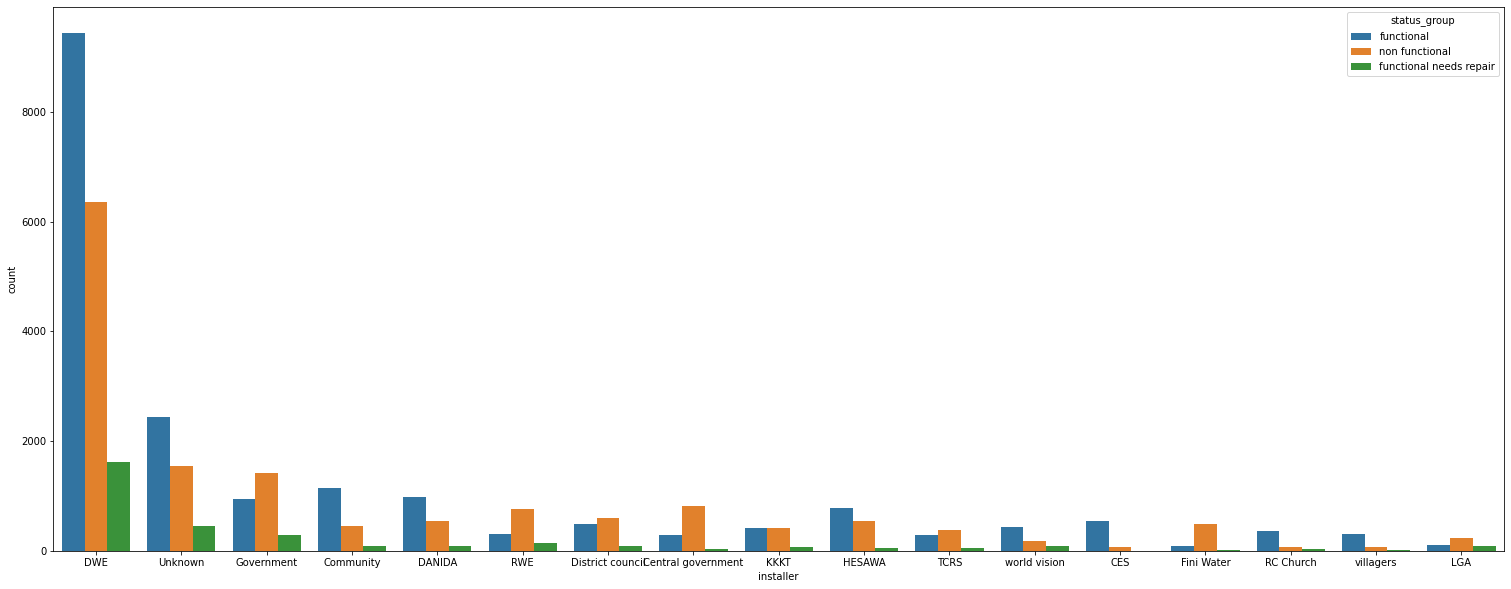

In [ ]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=data_installer)

In [ ]:
data['installer_cat'] = data['installer'] # To make new categorizes, creating new column
test_values['installer_cat'] = test_values['installer'] # To make new categorizes, creating new column

In [ ]:
data['installer_cat'] = data['installer']

In [ ]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


data.loc[~data["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

In [ ]:
test_values.loc[~test_values["installer_cat"].isin(c_ins), "installer_cat"] = "Others"

In [ ]:
data['funder'].fillna(value='Unknown',inplace=True)
data['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [ ]:
test_values['funder'].fillna(value='Unknown',inplace=True)
test_values['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [ ]:
data['funder'].value_counts().head(20)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [ ]:
data1 = data.loc[data['funder']== 'Government Of Tanzania']
data2 = data.loc[data['funder']== 'Unknown']              
data3 = data.loc[data['funder']== 'Danida'] 
data4 = data.loc[data['funder']== 'Hesawa'] 
data5 = data.loc[data['funder']== 'Rwssp'] 
data6 = data.loc[data['funder']== 'World Bank'] 
data7 = data.loc[data['funder']== 'Kkkt'] 
data8 = data.loc[data['funder']== 'World Vision']
data9 = data.loc[data['funder']== 'Unicef'] 
data10 = data.loc[data['funder']== 'Tasaf'] 
data11 = data.loc[data['funder']== 'District Council'] 
data12 = data.loc[data['funder']== 'Dhv'] 
data13 = data.loc[data['funder']== 'Private Individual'] 
data14 = data.loc[data['funder']== 'Dwsp'] 
data15 = data.loc[data['funder']== 'Norad'] 
data16 = data.loc[data['funder']== 'Germany Republi']
data17 = data.loc[data['funder']== 'Tcrs']
data18 = data.loc[data['funder']== 'Ministry Of Water']
data19 = data.loc[data['funder']== 'Water']
data20 = data.loc[data['funder']== 'Dwe']

data_funder = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,
                          data13,data14,data15,data16,data17,data18,data19,data20], ignore_index=True)

In [ ]:
test_values1 = test_values.loc[test_values['funder']== 'Government Of Tanzania']
test_values2 = test_values.loc[test_values['funder']== 'Unknown']              
test_values3 = test_values.loc[test_values['funder']== 'Danida'] 
test_values4 = test_values.loc[test_values['funder']== 'Hesawa'] 
test_values5 = test_values.loc[test_values['funder']== 'Rwssp'] 
test_values6 = test_values.loc[test_values['funder']== 'World Bank'] 
test_values7 = test_values.loc[test_values['funder']== 'Kkkt'] 
test_values8 = test_values.loc[test_values['funder']== 'World Vision']
test_values9 = test_values.loc[test_values['funder']== 'Unicef'] 
test_values10 = test_values.loc[test_values['funder']== 'Tasaf'] 
test_values11 = test_values.loc[test_values['funder']== 'District Council'] 
test_values12 = test_values.loc[test_values['funder']== 'Dhv'] 
test_values13 = test_values.loc[test_values['funder']== 'Private Individual'] 
test_values14 = test_values.loc[test_values['funder']== 'Dwsp'] 
test_values15 = test_values.loc[test_values['funder']== 'Norad'] 
test_values16 = test_values.loc[test_values['funder']== 'Germany Republi']
test_values17 = test_values.loc[test_values['funder']== 'Tcrs']
test_values18 = test_values.loc[test_values['funder']== 'Ministry Of Water']
test_values19 = test_values.loc[test_values['funder']== 'Water']
test_values20 = test_values.loc[test_values['funder']== 'Dwe']

test_values_funder = pd.concat([test_values1,test_values2,test_values3,test_values4,test_values5,test_values6,test_values7,test_values8,test_values9,test_values10,test_values11,test_values12,
                          test_values13,test_values14,test_values15,test_values16,test_values17,test_values18,test_values19,test_values20], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Danida'),
 Text(0, 0, 'Hesawa'),
 Text(0, 0, 'Rwssp'),
 Text(0, 0, 'World Bank'),
 Text(0, 0, 'Kkkt'),
 Text(0, 0, 'World Vision'),
 Text(0, 0, 'Unicef'),
 Text(0, 0, 'Tasaf'),
 Text(0, 0, 'District Council'),
 Text(0, 0, 'Dhv'),
 Text(0, 0, 'Private Individual'),
 Text(0, 0, 'Dwsp'),
 Text(0, 0, 'Norad'),
 Text(0, 0, 'Germany Republi'),
 Text(0, 0, 'Tcrs'),
 Text(0, 0, 'Ministry Of Water'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Dwe')]

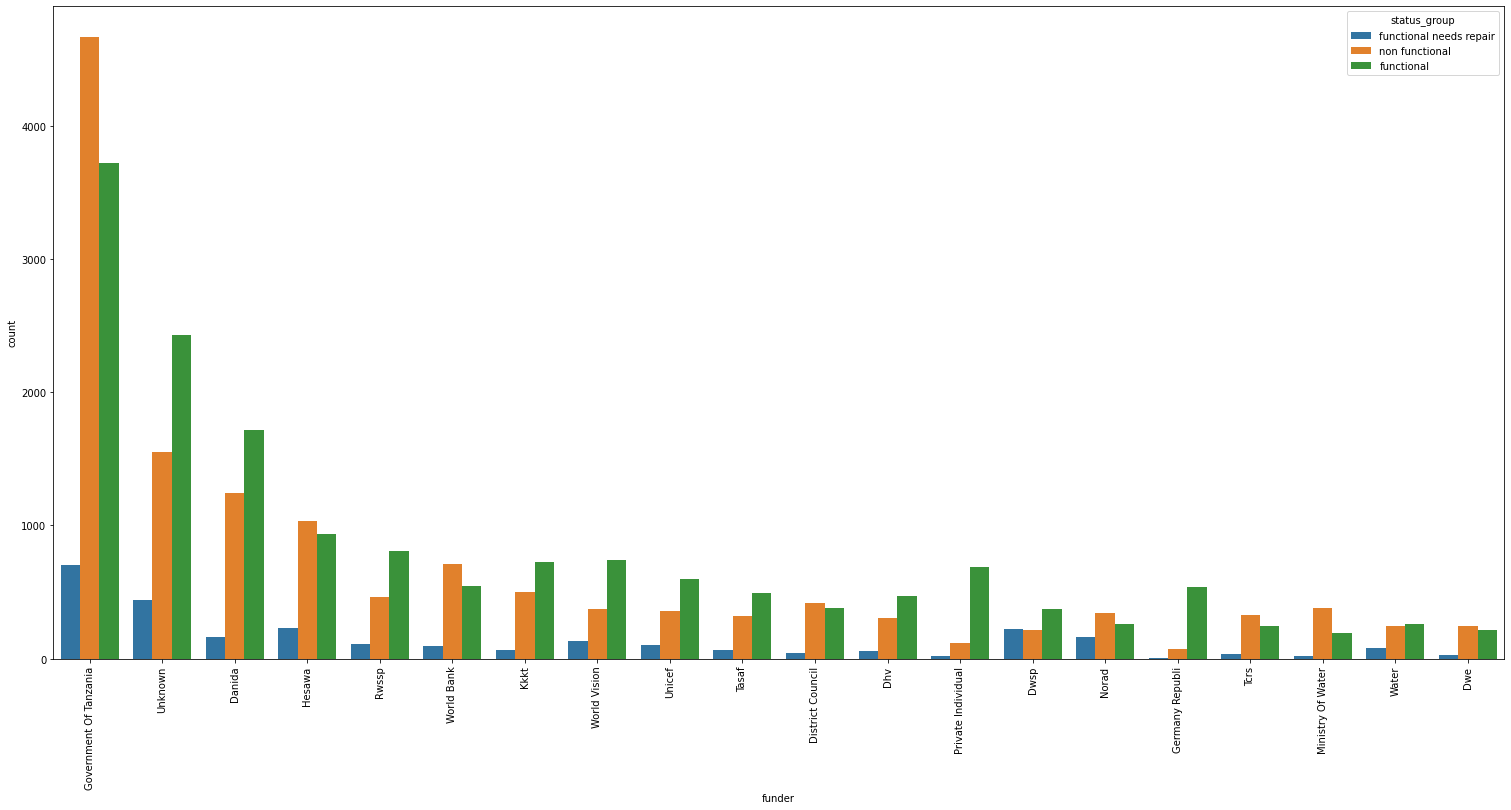

In [ ]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=data_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [ ]:

# To collect values together

data['funder_cat'] = data['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

data.loc[~data["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [ ]:
test_values['funder_cat'] = test_values['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

test_values.loc[~test_values["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [ ]:
data['funder_cat'].nunique() # We have 21 unique values for this column

21

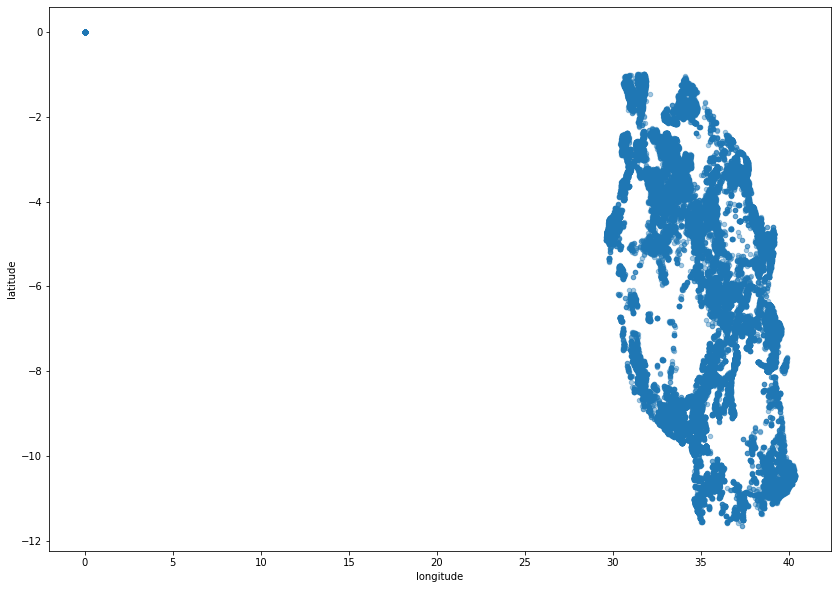

In [ ]:
data.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);
# To see the outliers

In [ ]:
data.loc[data['longitude']==0] # to check outside of Tanzania

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,decade,installer_cat,funder_cat
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,NaN,False,2000,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,functional,0,DWE,Dwsp
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,Nyang'hwale,True,2000,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,non functional,0,Government,Government Of Tanzania
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,NaN,False,2000,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,functional,0,Others,Others
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,NaN,False,2000,other,wug,unknown,soft,enough,shallow well,other,non functional,0,DWE,Others
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,NaN,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional needs repair,0,DWE,Hesawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,NaN,False,2000,nira/tanira,wug,other,soft,enough,shallow well,hand pump,functional needs repair,0,DWE,Dwsp
59208,3631,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,functional,0,DWE,Dwsp
59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,NaN,False,2000,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,functional needs repair,0,DWE,Rwssp
59324,748,0.0,2013-01-22,World Vision,0,world vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,functional,0,world vision,World Vision


In [ ]:
data.loc[data['longitude']!=0].describe() # to find the non-zero values mean

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,327.645219,689.325137,35.149669,-5.885572,0.489060,15.217615,5.728311,185.570831,1997.859919
std,21454.51421,3043.831403,693.564188,2.607428,2.809876,12.426954,17.855254,9.760254,477.744239,10.331744
min,0.00000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18522.75000,0.000000,0.000000,33.285100,-8.643841,0.000000,5.000000,2.000000,0.000000,1995.000000
50%,37054.50000,0.000000,426.000000,35.005943,-5.172704,0.000000,12.000000,3.000000,35.000000,2000.000000
75%,55667.25000,30.000000,1332.000000,37.233712,-3.372824,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74247.00000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
data['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean
test_values['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean

In [ ]:
data['wpt_name'].value_counts()

none                      3563
Shuleni                   1748
Zahanati                   830
Msikitini                  535
Kanisani                   323
                          ... 
Kwa Salumu Ndauka            1
Kwa Kujo                     1
Kwa Wisanguye                1
Shule Ya Msingi Iduo         1
Kwa Mzee Omari Kipande       1
Name: wpt_name, Length: 37400, dtype: int64

In [ ]:
data['scheme_name'].value_counts()

K                                682
None                             644
Borehole                         546
Chalinze wate                    405
M                                400
                                ... 
Bany                               1
Busunzu/Nyankwi gravity water      1
BL Namwai                          1
Chemchem ya Wamweru                1
Madimba water supply               1
Name: scheme_name, Length: 2696, dtype: int64

In [ ]:
data.duplicated(subset='id', keep='first').sum() # to check the dublicates of id

0

In [ ]:
data.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )
test_values.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

In [ ]:
data['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

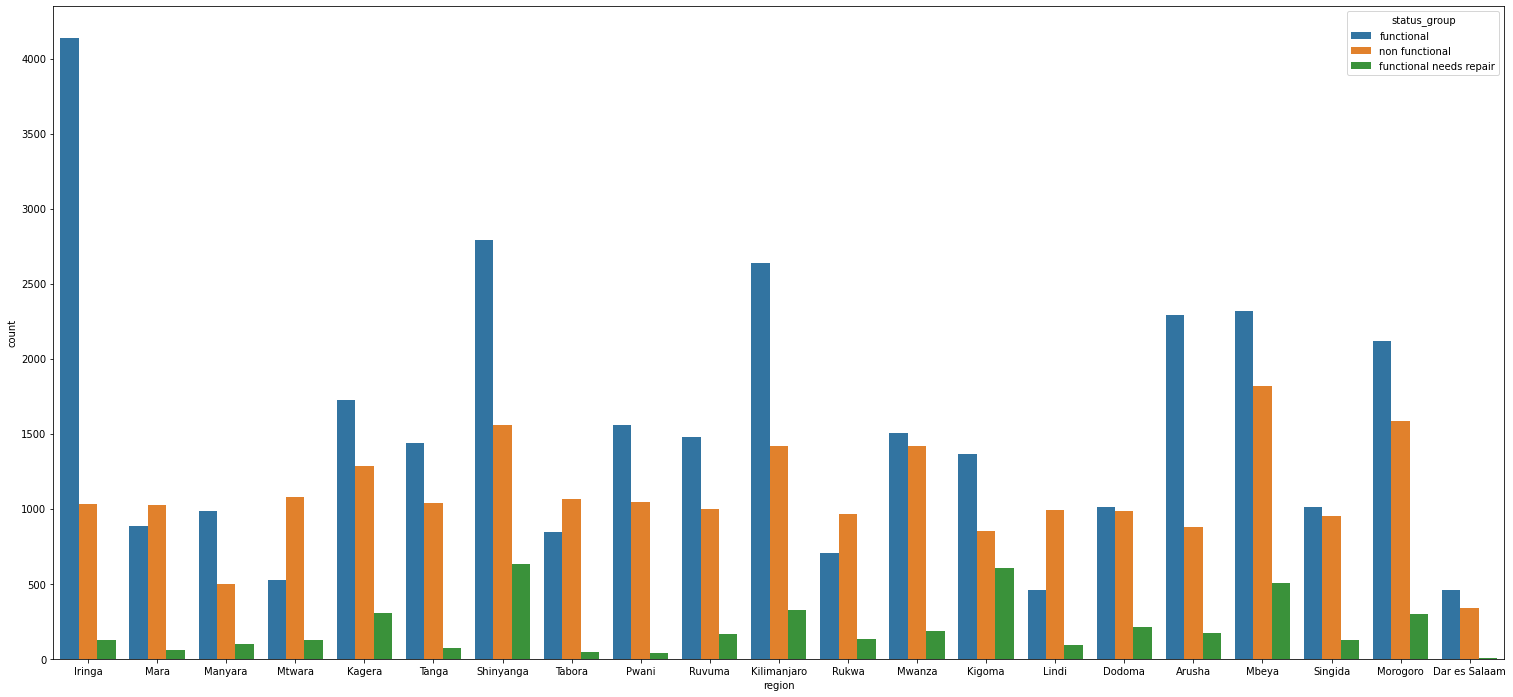

In [ ]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=data)

In [ ]:
data_iringa =data.loc[data['region']=='Iringa'] #to see the Iringa area

In [ ]:
data_iringa.groupby(['water_quality','status_group']).count()

amount_tsh  ...  funder_cat
water_quality status_group                         ...            
coloured      functional                        1  ...           1
              non functional                    1  ...           1
salty         functional                       19  ...          19
              non functional                    8  ...           8
soft          functional                     4120  ...        4120
              functional needs repair         123  ...         123
              non functional                  983  ...         983
unknown       functional                        1  ...           1
              non functional                   38  ...          38

[9 rows x 27 columns]

In [ ]:
data_daressalaam =data.loc[data['region']=='Dar es Salaam'] #to see the Dar es Salaam area
test_values_daressalaam =test_values.loc[test_values['region']=='Dar es Salaam'] #to see the Dar es Salaam area

In [ ]:
data_daressalaam.groupby(['water_quality','status_group']).count()

amount_tsh  ...  funder_cat
water_quality      status_group                         ...            
fluoride abandoned non functional                    2  ...           2
milky              functional                        1  ...           1
                   non functional                    1  ...           1
salty              functional                       41  ...          41
                   non functional                  100  ...         100
salty abandoned    functional                       63  ...          63
                   non functional                   37  ...          37
soft               functional                      352  ...         352
                   functional needs repair           3  ...           3
                   non functional                  186  ...         186
unknown            functional                        4  ...           4
                   non functional                   15  ...          15

[12 rows x 27 columns]

In [ ]:
data['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [ ]:
data.loc[data['amount_tsh']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,19706,19706,19706,19706,19706,19706,19706,19706,19706,19501,19706,19706,19706,19706,19706,18444,18374,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
functional needs repair,3048,3048,3048,3048,3048,3048,3048,3048,3048,3047,3048,3048,3048,3048,3048,2906,2775,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
non functional,18885,18885,18885,18885,18885,18885,18885,18885,18885,18720,18885,18885,18885,18885,18885,17475,17862,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [ ]:
data['amount_tsh'].value_counts()/data['amount_tsh'].count()

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

In [ ]:
data.drop(columns=['amount_tsh'],inplace=True )
test_values.drop(columns=['amount_tsh'],inplace=True )

In [ ]:
data.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774


In [ ]:
data['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [ ]:
data['gps_height'].value_counts()/data['gps_height'].count()

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
           ...   
 2285    0.000017
 2424    0.000017
 2552    0.000017
 2413    0.000017
 2385    0.000017
Name: gps_height, Length: 2428, dtype: float64

In [ ]:
data['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [ ]:
data.loc[data['population']==0].groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11071,11274,11274,11274,11274,11274,10700,10596,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1732,1613,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8332,8174,8332,8332,8332,8332,8332,7967,8063,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


In [ ]:
data.loc[data['population']!=0].describe() # to see without zero mean and median

,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,969.889634,36.074387,-6.139781,0.740788,6.299456,281.087167,1996.908283
std,612.544787,2.586779,2.737733,15.288297,11.303334,564.687660,12.425377
min,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,347.000000,34.715340,-8.388839,0.000000,2.000000,40.000000,1988.000000
50%,1135.000000,36.706815,-5.750877,0.000000,3.000000,150.000000,2000.000000
75%,1465.000000,37.940149,-3.597016,0.000000,5.000000,324.000000,2008.000000
max,2770.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [ ]:
data['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean
test_values['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean

In [ ]:
data.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,34,39,39,39,39,39,39,39,39,39,39,39
functional needs repair,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4
non functional,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
data.drop(columns=['date_recorded'],inplace=True )
test_values.drop(columns=['date_recorded'],inplace=True )

In [ ]:
data.drop(columns=['num_private'],inplace=True )
test_values.drop(columns=['num_private'],inplace=True )

In [ ]:
data['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

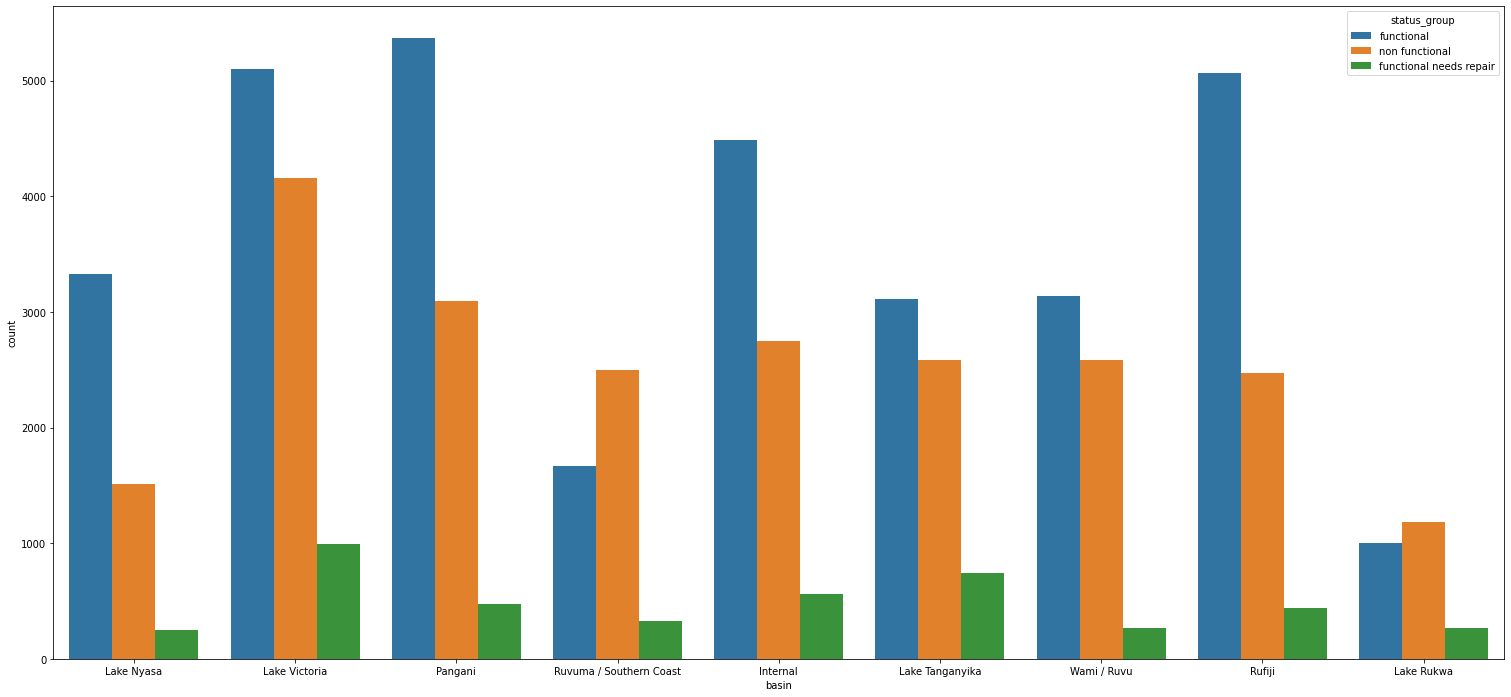

In [ ]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=data)

In [ ]:
data['subvillage'].nunique()

19287

In [ ]:
data.drop(columns=['subvillage'],inplace=True )
test_values.drop(columns=['subvillage'],inplace=True )

In [ ]:
data['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

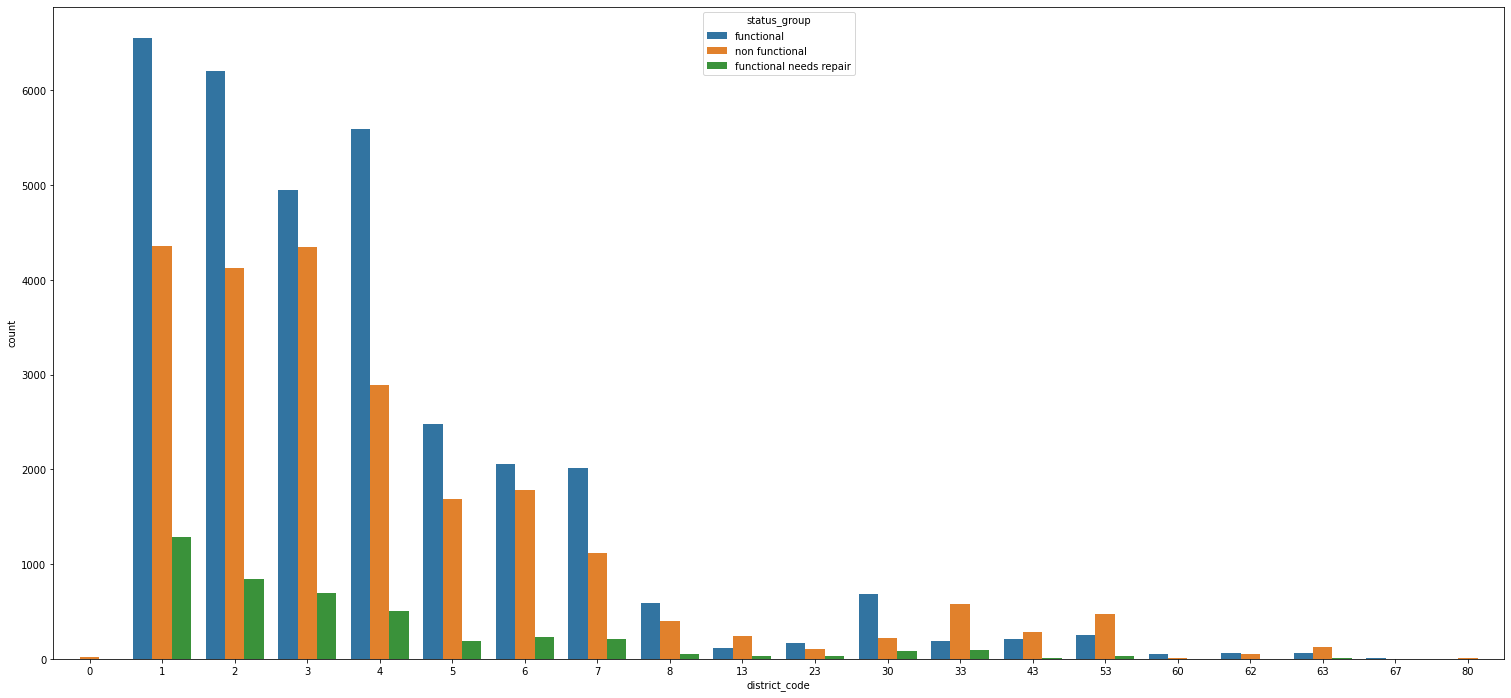

In [ ]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='district_code', hue="status_group", data=data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 59400 non-null  object 
 1   gps_height             59400 non-null  int64  
 2   installer              59400 non-null  object 
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   basin                  59400 non-null  object 
 6   region                 59400 non-null  object 
 7   district_code          59400 non-null  int64  
 8   lga                    59400 non-null  object 
 9   ward                   59400 non-null  object 
 10  population             59400 non-null  int64  
 11  public_meeting         56066 non-null  object 
 12  permit                 56344 non-null  object 
 13  construction_year      59400 non-null  int64  
 14  extraction_type_group  59400 non-null  object 
 15  ma

In [ ]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 14850 non-null  object 
 1   gps_height             14850 non-null  int64  
 2   installer              14850 non-null  object 
 3   longitude              14850 non-null  float64
 4   latitude               14850 non-null  float64
 5   basin                  14850 non-null  object 
 6   region                 14850 non-null  object 
 7   district_code          14850 non-null  int64  
 8   lga                    14850 non-null  object 
 9   ward                   14850 non-null  object 
 10  population             14850 non-null  int64  
 11  public_meeting         14029 non-null  object 
 12  permit                 14113 non-null  object 
 13  construction_year      14850 non-null  int64  
 14  extraction_type_group  14850 non-null  object 
 15  ma

In [ ]:
data['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [ ]:
data['public_meeting'].fillna(value=True,inplace=True)
test_values['public_meeting'].fillna(value=True,inplace=True)

In [ ]:
data['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [ ]:
data['permit'].fillna(value=True, inplace=True)
test_values['permit'].fillna(value=True, inplace=True)

In [ ]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
data['status_group'] = data['status_group'].replace(target_status_group)

In [ ]:
data['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [ ]:
data.to_csv('/content/drive/MyDrive/ML Project/clean_training_data.csv')

In [ ]:
test_values.to_csv('/content/drive/MyDrive/ML Project/clean_testing_data.csv')

In [ ]:
### To see the relation between water quantity and quality with functionality
data.groupby(['quantity','water_quality','status_group']).count().head(50)